kNN Classification

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

# In ML features are marked with capital 'X' and labels with lowercase 'y'
iris = load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names
feature_names = iris.feature_names

print("Label names (categories or classes):", target_names)
print("Feature names (vector components):", feature_names)
print("\nFirst 5 rows of Data (X):\n", X[:5])

# Split the dataset into two parts: the training set and the test set i.e. train_test_split()
# The 'test_size = 0.3' means that 30% of the data should be allocated to the test data set and
# 70% for the training
# The 'random_state=1' ensures the same split of data every time the code runs, making results
# consistent and reproducible. Without it, the data is split differently with each code run.
# In k-NN, there is no explicit training process or model parameters to optimize,
# so a validation set is not strictly necessary.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)
print("\nSHAPES")
print(X_train.shape)
print(X_test.shape)

# Invoke kNN Algorithm that is already integrated in Sklearn i.e. KNeighborsClassifier(n_neighbors = 3)
# The model is stored in 'classifier_knn' variable
# The 'fit' function trains the model i.e. it applies the kNN to the test data set to determine its performance
# The 'predict' function tests the model with new (test) data
# The model is stored in 'y_pred' variable
# In the end we measure the accuracy
classifier_knn = KNeighborsClassifier(n_neighbors = 3) # 3 closest neighbors
classifier_knn.fit(X_train, y_train)
y_pred = classifier_knn.predict(X_test)
print("\nAccuracy:", metrics.accuracy_score(y_test, y_pred))


# Uncomment block of code below to see the accuracies for knn 1 - 105
# accuracies = {}
# for i in range(1, 106):
#   classifier_knn = KNeighborsClassifier(n_neighbors = int(i)) # 3 closest neighbors
#   classifier_knn.fit(X_train, y_train)
#   y_pred = classifier_knn.predict(X_test)
#   accuracy = metrics.accuracy_score(y_test, y_pred)
#   accuracies = {i: accuracy}
#   print(accuracies)



# QUESTIONS
# 1) Which function is used to split the dataset?
# The train_test_split() splits the dataset into the training and test data sets
# The 'test_size = 0.3' means that 30% of the data is allocated to the test and 70% to the training data
# The 'random_state=1' ensures the same split of data every time the code runs, making results
# consistent and reproducible. Without it, the data would be split differently with each code run.

# 2) What parameters does this function (train_test_split) accept (check the function’s documentation)?
# According to the documentation, the parameters are:
# - X: features
# - y: target variables (categories or classes)
# - test_size: proportion of the test data based on the provided data set
# - train_size: proportion of the training data based on the provided data set
# - random_state: ensures the same split of data every time the code runs, making results consistent and reproducible. Without it, the data is split differently with each code run
# - shuffle: whether to shuffle the data before splitting. If set to False, the data will be split in the original order
# - stratify: ensures the split maintains the same proportion of each class as in the original dataset, which is especially useful for imbalanced datasets

# 3) What are the shapes of the resulting datasets?
# X_train (training features): (105, 4) — 105 samples, each with 4 features.
# X_test (testing features): (45, 4) — 45 samples, each with 4 features

# 4) Is this a large dataset?
# The Iris dataset is not a large data set. It contains only 150 samples (105 for training, 45 for testing).

# 4) What is a large dataset?
# A large dataset would probably contain thousands of samples, depending on the problem at hand.
# A dataset is considered large when it:
# - requires significant memory or storage
# - contains many samples, for example 1,000 or more for images or millions or text data
# - demands distributed computing or specialized tools to process efficiently

# 5) Why don’t we have a validation split here?
# In k-NN, there is no explicit training process or model parameters to optimize,
# so a validation set is not strictly necessary.
# In this example, the dataset is small, and cross-validation is typically used to evaluate
# the model instead of a separate validation split. The cross-validation would mean split the data set into
# pairs of trainig-test data sets and multiple trainigs and testings. For simplicity, the code focuses on
# splitting into one training and one testing set and it then evaluates accuracy on the test set.


# 6) How is k-NN imported and called (invoked)?
# The import is done in the following way: from sklearn.neighbors import KNeighborsClassifier
# In order to call it, we instance the KNeighborsClassifier by specifying the number of
# neighbors (n_neighbors).


# 7) What is the value of k?
# The k in our case is 3. Therefore, the algorithm will consider the 3 closest data points
# to classify our new samples.

# 8) How can value of k determine algorithm’s accuracy?
# Just as we learned in our lectures, small k leads to overfitting, while the large k leads to
# underfitting. In case of small k e.g. 1, the model wil make decisions based on a single nearest neighbor.
# On the other hand, in case of large k would average over many points and misrepresent the structure.
# The best-case scenario would be to choose the right k that balances bias and variance to provide
# the best accuracy. A common practice could include cross-validation or a grid search to test different
# k values and find the one that maximizes performance on validation data.

# 9) Which function is used to train the classifier model?
# The 'fit' method takes the training data and their labels, 'trains' the k-NN model by
# storing the data and preparing it for predictions based on the k-NN algorithm.
# According to the documentation, the k-NN is a lazy learning algorithm, which means that it does not
# perform actual 'training' in the traditional sense. Instead, it simply stores the training data for
# use during prediction.

# 10) What is even done in the training phase of this algorithm?
# According to the documentation, the k-NN is a lazy learning algorithm, which means that it does not
# perform actual 'training' in the traditional sense. Instead, it stores the training data for
# use during prediction. In a nutshell, the algorithm calculates distances between the new data point
# and all stored training points to find the k-nearest neighbors.

# 11) What is the accuracy of this algorithm?
# The accuracy of the algorithm is 0.9777777777777777, or approximately 97.78%, which means that the
# model correctly predicted the class of 97.78% of the test samples, and that it misclassified 2.22%
# of the test samples. Accuracy = Number of Correct Predictions / Total Number of Predictions

# 12) Is this accuracy satisfactory?
# For our dataset and purposes, 97.78% is a satisfactory accuracy.

# 13) Is this algorithm applicable in the real world situations?
#  Real-world applications would probably require additional evaluation metrics and testing on larger
# and more complex datasets, so that true performance can be determined with a bit more reliability.

# 14) Repeat this process for several different values of k. Does the result change?
# I was interested in the dynamics of predictions, so I wrote a loop to test the accuracy based on k value that
# ranges from 1 to 105. Although the result changes based on the k value, most of the time it does not change with every
# change of the value of k. Rather, there are ranges in which change of the value of k does not change
# the accuracy. See question 8 above for a bit more details.
# k = 1 - 31:   0.9777777777777777
# k = 32 - 44:  0.9555555555555556
# k = 45 - 48:  0.9333333333333333
# k = 49 - 58:  0.9111111111111111
# k = 59 - 60:  0.8222222222222222
# k = 61 - 64:  0.8444444444444444
# k = 65 - 66:  0.7333333333333333
# k = 67 - 69:  0.7111111111111111
# k = 70 - 71:  0.6888888888888889
# k = 72 - 86:  0.6666666666666666
# k = 87 - 94:  0.6444444444444445
# k = 95:       0.6222222222222222
# k = 96 - 104: 0.6
# k = 105:      0.28888888888888886

# 15) If so, are the changes drastic, and what is the ’optimal’ value of k?
# In the previous question, it is explained how the value of k affects the accuracy. The best accuracy
# is achieved with the k between 1 and 31, which tells us that the sample is pretty small. The changes
# between the small and large values of k are drastic.

# 16) What would happen if we set the value of k equal to the number of samples in the test dataset?
# That would lead to underfitting and very low accuracy. See question 8 and 14 above.




Simple kNN algorithm

In [ ]:
import numpy as np
from collections import Counter

# Calculate the vector distance
# distances = [0.4582575694955844, 0.8124038404635958, 3.263433774416144, 0.3316624790355399, 0.648074069840786, 3.4102785809959864]
def euclidean_distance(test_row, train_row):
    return np.sqrt(np.sum((test_row - train_row) ** 2))


class KNN:
    def __init__(self, k=3):
        self.k = k


    # No real training in kNN, just data initialization
    # In k-NN, there is no explicit training process or model parameters to optimize, so a validation set is not strictly necessary.
    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train


    # determine k nearest neighbors (rows) and take classes from these rows
    def predict(self, X_test):
        prediction = []

        for test_row in X_test:
            distances = [euclidean_distance(test_row, train_row) for train_row in self.X_train]
            k_distance_indices = np.argsort(distances)[:self.k]
            k_nearest_classes = [self.y_train[index] for index in k_distance_indices]
            prediction.append(Counter(k_nearest_classes).most_common(1))
        return np.array(prediction)



# TEST THE CODE
# Any number of rows can be added to the data set below
# The loop ensures that the number of classes in array matches the number of rows
classes = []
data = []
X_test = np.array([[5.5, 3.5, 1.6, 0.3], [6.5, 3.7, 4.6, 1.3]])

data_with_labels = np.array([[5.1, 3.5, 1.4, 0.2, 'setosa'],
                             [4.9, 3.0, 1.4, 0.2, 'versicolor'],
                             [6.7, 3.1, 4.4, 1.4, 'virginica'],
                             [5.2, 3.6, 1.5, 0.3, 'setosa'],
                             [5.0, 3.1, 1.5, 0.3, 'versicolor'],
                             [6.8, 3.2, 4.5, 1.5, 'virginica']])

for row in data_with_labels:
    classes.append(row[4])
    data.append(row[:4])


y_train = np.array(classes)
X_train = np.array(data, dtype=float)
model = KNN(k=3)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

for i, row in enumerate(y_pred):
  print("\nThe sample", X_test[i], "is of the class", row[0][0])
  print("The sample", X_test[i], "matched", row[0][1], "data sets of this class.")


Decision tree classification

In [ ]:
# @title
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split


# In ML features are marked with capital 'X' and labels with lowercase 'y'
iris = load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names
feature_names = iris.feature_names
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)


# Create and train the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dt_classifier.predict(X_test)

# Calculate accuracy
accuracy = (y_pred == y_test).mean()
print(f"Accuracy: {accuracy:.2f}")

# Visualize the decision tree
plt.figure(figsize=(12, 8))
# The filled, feature_names and class_names must be passed as 'key-value' pairs
plot_tree(dt_classifier, filled=True, feature_names=iris.feature_names, class_names=iris.target_names)
plt.title("Decision Tree Classifier for Iris Species")
plt.show()

Linear regression

Coefficients:  [985.03296508]
Mean Squared Error:  4457.265022818747


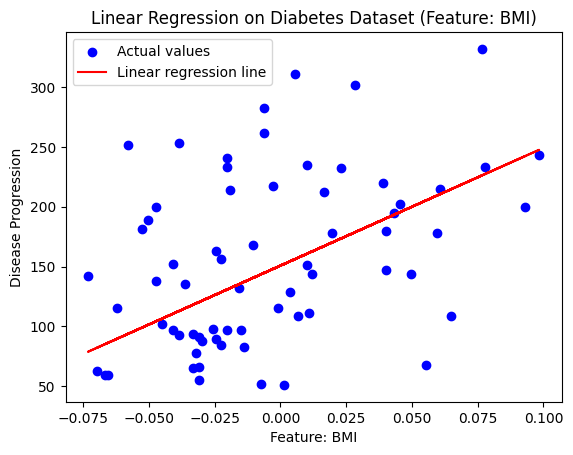

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import sys
#sys.exit("Stopping the script execution.")


diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target
# print("Features: ", diabetes.feature_names)
# print("Target: ", diabetes.target)

# Only the third feature (index 2) required
X_feature = X[:, 2].reshape(-1, 1) # convert the 3rd feature from 1D into a 2D array (one column)
X_train, X_test, y_train, y_test = train_test_split(X_feature, y, test_size=0.15, random_state=1)


# Initialize the linear regression model, train it and predict
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Coefficients of the regression model and Mean Squared Error of the predictions
mse = mean_squared_error(y_test, y_pred)
print("Coefficients: ", model.coef_)
print("Mean Squared Error: ", mse)


# Scatter plot of the actual values from the testing set
# Overlay the linear regression line corresponding to the predicted values
plt.scatter(X_test, y_test, color='blue', label='Actual values')
plt.plot(X_test, y_pred, color='red', label='Linear regression line')
plt.xlabel('Feature: BMI')
plt.ylabel('Disease Progression')
plt.title('Linear Regression on Diabetes Dataset (Feature: BMI)')
plt.legend()
plt.show()




# 1) What are the features, and what are the targets?
# Features: ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
# Targets: [151.  75. 141. 206. 135.  97. 138.  63. 110. 310......]

# 2) At the end, see what would happen if the first or second feature are used?
# The first feature is 'age' which means we have a model that predicts the disease progression based on the patients' age.
# Second feature is 'sex' which means we have a model that predicts disease based on patients' gender.